This is my first exploration of the David et al dataset. This is mostly for me to get a feel for what data I have here.

In [114]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from skbio.diversity import beta_diversity
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

# Explore the data and metadata: what samples do we have here?

In [115]:
fotu = '../../data/raw/david/qiime/david.feature_table.txt'
fmeta = '../../data/raw/david/'
df = pd.read_csv(fotu, sep='\t', index_col=0, skiprows=1)
df.head()

,ETEC26,ETEC67,ETEC25,ETEC51,ETEC1,LD248,ETEC50,LD244,ETEC49,LD5,...,ETEC69,ETEC46,LD272,LD202,LD14,LD239,LD23,ETEC28,ETEC31,LD229
#OTU ID,,,,,,,,,,,,,,,,,,,,,
354531f07146c620d1609b7b8412e177,23684.0,5984.0,118.0,0.0,4017.0,5591.0,6686.0,240.0,0.0,0.0,...,6596.0,4409.0,1665.0,94.0,141817.0,2659.0,4509.0,7814.0,5570.0,5313.0
a858f6587e59c332c60be1eb99df8697,12398.0,19310.0,516.0,0.0,328.0,19779.0,1436.0,105.0,20276.0,2900.0,...,3058.0,279.0,111.0,337.0,33287.0,44635.0,241.0,34018.0,10642.0,4422.0
c9d6d95c333dff7d459025b95baf2a64,10066.0,0.0,0.0,0.0,2640.0,0.0,81.0,0.0,0.0,0.0,...,555.0,2.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0
c8a9b099a1b7dfc073984d2d08f9a307,9566.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,57.0,0.0,0.0,0.0
472cf4e6b4bb69615ad5e837b3683020,8993.0,1685.0,961.0,2.0,13560.0,9.0,690.0,314.0,19.0,52.0,...,1898.0,257.0,1839.0,2326.0,2.0,0.0,8488.0,0.0,61.0,5.0


In [116]:
fmeta = '../../data/raw/david/david.metadata.txt'
meta = pd.read_csv(fmeta, sep='\t')
meta.index = meta['SampleID']
meta.head()

,Barcode,Cohort,Health,Household,LinkerPrimerSequence,Mapped Reads,Mapped reads,Sample day (dpp),SampleID,SampleType,Sequencing run,Subject,Subject / Contact
SampleID,,,,,,,,,,,,,
LD1,GCTTCTCTCACT,Pilot,Diarrhea,NaN,CCGGACTACHVGGGTWTCTAAT,148790.0,NaN,NaN,LD1,Feces,1,4.00,NaN
LD2,GCGCAATAGTAT,Pilot,Diarrhea,NaN,CCGGACTACHVGGGTWTCTAAT,124473.0,NaN,NaN,LD2,Feces,1,5.00,NaN
LD3,ATCGTCCGCGAT,Pilot,Diarrhea,NaN,CCGGACTACHVGGGTWTCTAAT,134311.0,NaN,NaN,LD3,Feces,1,7.00,NaN
LD4,TCGCCAGTGCAT,Pilot,Diarrhea,NaN,CCGGACTACHVGGGTWTCTAAT,132346.0,NaN,NaN,LD4,Feces,1,9.00,NaN
LD5,GTGCACGATAAT,Pilot,Healthy,NaN,CCGGACTACHVGGGTWTCTAAT,73549.0,NaN,NaN,LD5,Feces,1,4.01,NaN


### Map sample IDs: OTU <--> metadata?

In [117]:
msamples = meta['SampleID'].values
osamples = df.columns

In [118]:
len(msamples), len(osamples), len(set(msamples + osamples))

(211, 211, 211)

In [119]:
print([i for i in osamples if i not in msamples])
print([i for i in msamples if i not in osamples])

[]
[]


Cool! The sample IDs all match! Yay!

In [120]:
meta['SampleType'].unique()

array(['Feces', 'Swab', nan], dtype=object)

The metadata includes both a pilot study with feces and swab samples from 4 diarrhea patients and 9 healthy patients, as well as the main study which has samples from patients at multiple time points, as well as their contacts (also sometimes at multiple time points).

Cohort 1 is the 27 cholera patients which were recruited at the hospital. These also had household contacts sampled. These patients are labeled by Household, Person, and days past presentation (dpp). 

I'm not sure how these patients are coded, but from Figure S1 (below) it looks like the "index case" is a different family member. I have two choices: either assume that patient 0 is the index case, or the person who is underlined in Figure S1 is the index case...

Cohort 2 is the 10 cholera patients whose samples were collected prior to azithromycin treatment (0 dpp). These patients each had one sample taken, and do not have associated household contacts sampled.

The ETEC Cohort is 18 patients who were tracked for up to 6 months after hospitalization.

A note that all of the non-pilot study samples are rectal swabs. So if I'm going to include the pilot samples, I should just use the rectal swabs (not feces).

Finally, a note that it seems that these samples are from a mix of children and adults. Not sure if this matters to us...

![](cohort-screenshot.png)

### Check data with reported sample sizes

First, let's make sure that this metadata matches what I got from the paper.

In [121]:
meta[['Cohort', 'Household', 'Subject / Contact']].drop_duplicates().groupby(['Cohort']).size()

Cohort
1        40
2        10
ETEC     18
Pilot     1
dtype: int64

In [122]:
meta.query('Cohort == "1"')['Household'].unique().shape

(13,)

Okay, looks like we do have 13 households from Cohort 1, 10 patients in cohort 2, and 18 ETEC patients.

Looking at Figure 2, seems like all the healthy contacts are the subject IDs that are > 0. (Also when I did the analysis coding patients as in Fig S1, there was no clear separation btw healthy and sick whereas now there is!)

### Add healthy/diarrhea status to metadata

In [123]:
# Add health status
def get_health_status(row):
    # Labeling from S1, which is wrong
    household_map = {'A': 2, 'B': 1, 'C': 0, 'D': 1, 
                     'E': 0, 'F': 2, 'G': 2, 'H': 0, 
                     'I': 1, 'J': 2, 'K': 2, 'L': 1, 
                     'M': 0}
    if row['Cohort'] == "Pilot":
        return row['Health']
    elif row['Cohort'] == "1":
        #if row['Subject / Contact'] == household_map[row['Household']]:
        if row['Subject / Contact'] == 0:
            return "Diarrhea"
        else:
            return "Healthy"
    else:
        return "Diarrhea"
        
meta['DiseaseState'] = meta.apply(get_health_status, axis=1)

# DADA2 data

## Clean up OTU table

First, let's get a sense of what data we have here

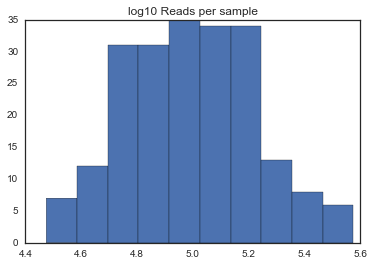

In [124]:
# Reads per sample
plt.hist(np.log10(df.sum()))
plt.title('log10 Reads per sample')

Good, looks like min sample has > 10,000 reads. No need to filter.

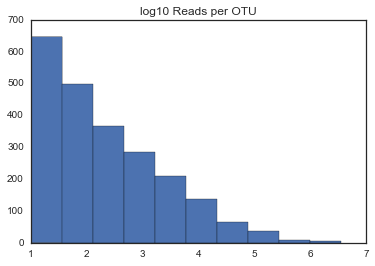

In [125]:
plt.hist(np.log10(df.sum(axis=1)))
plt.title('log10 Reads per OTU')

Minimum number of reads per OTU is 10. I'm guessing qiime had some built-in filtering somewhere? Anyway, I think we're good to just go ahead without cleaning up the data!

## PCA

First, let's reproduce the PCA plots. They did weighted/unweighted Unifrac and Bray Curtis. I don't want to build a tree, so I'll just do bray curtis.

In [126]:
# Rows should contain samples, columns should have OTUs
df = df.T
df.head()

#OTU ID,354531f07146c620d1609b7b8412e177,a858f6587e59c332c60be1eb99df8697,c9d6d95c333dff7d459025b95baf2a64,c8a9b099a1b7dfc073984d2d08f9a307,472cf4e6b4bb69615ad5e837b3683020,90d7949a236bc7dd1fc975fd271a9107,386686a48aa9b4b30a2da76535947cfc,bf7983747c9d16749684b1eec6db224c,e2822fc3ca34201fcf6da2855fce32ff,fa8b2ccbcc74b7e507fe18d25e90268e,...,172ffe3c43cd1fd97f0ca1bcd123036e,0ace5e58a4c734a50db628f9c7ac030d,c0c924f4e5b489f66138f88ad1af6b73,76b9d0ec9b2dffdaf5ea3aa2538a48a9,0c3da651754f17d6e042106bbc3a72e8,41516c8b752cca37e96d3e1193b80c31,d5d772cb2dc1ae13abd0a8b789b47066,ef5a74a8d2cb67bdab8a45554a43fa18,e185cebd996aadf44f95970155c0f52d,d83014e318dfeb49eed2b6fce811c88c
ETEC26,23684.0,12398.0,10066.0,9566.0,8993.0,8757.0,5479.0,4351.0,4094.0,4088.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETEC67,5984.0,19310.0,0.0,2.0,1685.0,0.0,105.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETEC25,118.0,516.0,0.0,2.0,961.0,0.0,0.0,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETEC51,0.0,0.0,0.0,0.0,2.0,0.0,0.0,688.0,2543.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETEC1,4017.0,328.0,2640.0,0.0,13560.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Calculate beta diversity
metric = 'braycurtis'
counts = df.astype(int).values
sample_ids = df.index.tolist()

results = beta_diversity(
    metric=metric,
    counts=counts,
    ids=sample_ids)

In [128]:
# Do PCA
dada_all_pca = PCA(random_state=12345).fit(results.to_data_frame().values)
ypca = dada_all_pca.transform(results.to_data_frame().values)

In [129]:
dfpca = pd.DataFrame(data=ypca, index=sample_ids, columns=['PC' + str(i) for i in range(ypca.shape[1])])
dfpca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210
ETEC26,1.507820,0.133218,-0.467868,0.717903,-0.158077,0.025177,-0.093964,-0.063651,-0.056127,-0.204712,...,0.000395,-0.000504,0.002361,0.001084,0.000493,0.000934,0.000065,-0.000234,0.000087,5.585810e-16
ETEC67,-1.113115,1.074726,-0.472075,0.014069,0.354732,-0.334458,-0.258984,-0.033467,0.085714,-0.080473,...,0.005298,-0.003473,0.002078,-0.000629,0.003530,0.000720,-0.000038,0.000189,0.000035,2.393918e-16
ETEC25,-0.879131,-0.315904,0.097161,-0.060756,-0.432432,0.296932,0.124939,-0.083480,0.250656,0.155899,...,0.001036,-0.000683,-0.001571,-0.000409,0.000997,0.000012,-0.000167,0.000138,0.000132,5.689893e-16
ETEC51,1.590205,-1.194567,-0.772463,-0.274118,-0.052992,0.152661,-0.013030,0.199503,-0.167279,0.134995,...,0.000108,0.001097,-0.000631,-0.000534,0.001379,0.000101,0.000135,-0.000040,0.000247,2.532696e-16
ETEC1,-2.085495,0.584639,-0.412623,-0.074272,0.182162,0.041676,-0.056091,-0.217047,-0.220406,-0.198891,...,0.004491,-0.010730,-0.014388,0.002507,-0.002339,0.001815,0.001423,-0.001903,0.000009,6.349088e-16


In [130]:
# Make dataframe for plotting
dada_all_toplot = pd.DataFrame(columns=['sample', 'PC0', 'PC1', 'disease'])
dada_all_toplot['sample'] = dfpca.index
dada_all_toplot['PC0'] = dfpca['PC0'].values
dada_all_toplot['PC1'] = dfpca['PC1'].values
dada_all_toplot = pd.merge(dada_all_toplot, meta, left_on='sample', right_index=True)
dada_all_toplot = dada_all_toplot.drop(['LinkerPrimerSequence', 'Mapped Reads', 'Mapped reads'], axis=1)
dada_all_toplot['disease_color'] = dada_all_toplot['DiseaseState'].apply(lambda x: 'r' if x == "Diarrhea" else 'b')

In [131]:
pca.explained_variance_ratio_.sum()

1.0

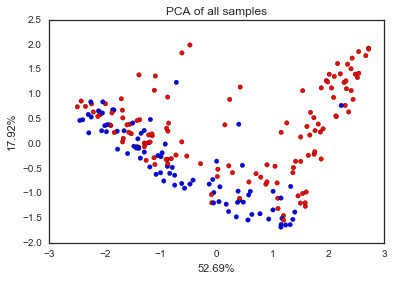

In [132]:
plt.scatter(dada_all_toplot['PC0'], dada_all_toplot['PC1'], c=dada_all_toplot['disease_color'])
plt.title("PCA of all samples")
plt.xlabel('{:.2f}%'.format(dada_all_pca.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(dada_all_pca.explained_variance_ratio_[1]*100))

## No ETEC samples

This plot doesn't really look like the published one, maybe it's because the other samples are messing up the PCA transformation?

In [133]:
keep_cohorts = ["1", "2"]
cohort1_results = results\
    .to_data_frame()\
    .loc[
        meta.query('Cohort == @keep_cohorts').index, 
        meta.query('Cohort == @keep_cohorts').index
    ]

In [134]:
cohort1_results.head()

SampleID,LD200,LD201,LD202,LD203,LD204,LD205,LD206,LD207,LD208,LD209,...,PreRx27,PreRx28,PreRx29,PreRx30,PreRx31,PreRx32,PreRx33,PreRx34,PreRx35,PreRx36
SampleID,,,,,,,,,,,,,,,,,,,,,
LD200,0.000000,0.995692,0.986777,0.930959,0.930398,0.461895,0.970304,0.880672,0.908170,0.826221,...,0.716705,0.956329,0.954721,0.883043,0.964642,0.815153,0.717430,0.848667,0.928565,0.817738
LD201,0.995692,0.000000,0.654341,0.627872,0.653652,0.996166,0.867044,0.695159,0.671106,0.843752,...,0.821981,0.753800,0.828867,0.998488,0.997198,0.999273,0.956331,0.987701,0.989050,0.999761
LD202,0.986777,0.654341,0.000000,0.716193,0.645675,0.995926,0.871599,0.632432,0.626597,0.891560,...,0.741495,0.646296,0.747237,0.996579,0.997908,0.996826,0.959757,0.987590,0.986771,0.998291
LD203,0.930959,0.627872,0.716193,0.000000,0.569061,0.941520,0.833010,0.714550,0.794784,0.800858,...,0.846443,0.812381,0.844765,0.982896,0.997449,0.975603,0.934040,0.984335,0.974061,0.985099
LD204,0.930398,0.653652,0.645675,0.569061,0.000000,0.971627,0.880675,0.728118,0.749154,0.835940,...,0.853918,0.751385,0.783205,0.989621,0.996993,0.989697,0.952735,0.982357,0.979858,0.993177


In [135]:
dada_noetec_pca1 = PCA(random_state=12345).fit(cohort1_results.values)
ypca1 = dada_noetec_pca1.transform(cohort1_results.values)

dfpca1 = pd.DataFrame(data=ypca1, index=cohort1_results.index, 
                      columns=['PC' + str(i) for i in range(ypca1.shape[1])])

# Make dataframe for plotting
dada_noetec_toplot = pd.DataFrame(columns=['sample', 'PC0', 'PC1', 'disease'])
dada_noetec_toplot['sample'] = dfpca1.index
dada_noetec_toplot['PC0'] = dfpca1['PC0'].values
dada_noetec_toplot['PC1'] = dfpca1['PC1'].values
dada_noetec_toplot = pd.merge(dada_noetec_toplot, meta, left_on='sample', right_index=True)
dada_noetec_toplot = dada_noetec_toplot.drop(['LinkerPrimerSequence', 'Mapped Reads', 'Mapped reads'], axis=1)
dada_noetec_toplot['disease_color'] = dada_noetec_toplot['DiseaseState'].apply(lambda x: 'r' if x == "Diarrhea" else 'b')

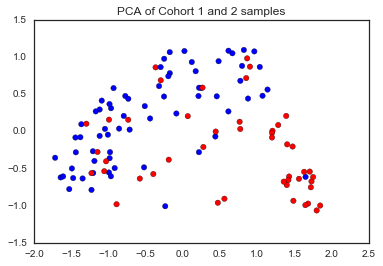

In [136]:
plt.scatter(dada_noetec_toplot['PC0'], dada_noetec_toplot['PC1'], c=dada_noetec_toplot['disease_color'], s=30)
plt.title("PCA of Cohort 1 and 2 samples")

Let's try to re-make the Fig 1C plot. Need to re-label all healthy samples as "healthy", so that only diarrheal patients have the Sample day (dpp) categorization.

In [137]:
def relabel_sample_day(row):
    if row['DiseaseState'] == "Healthy":
        return "healthy"
    else:
        day = row['Sample day (dpp)']
        if day == 0 or day == 1:
            return day
        elif 4 < day < 10:
            return 7
        elif day > 15:
            return 30
dada_noetec_toplot['sample_day_disease'] = dada_noetec_toplot.apply(relabel_sample_day, axis=1)

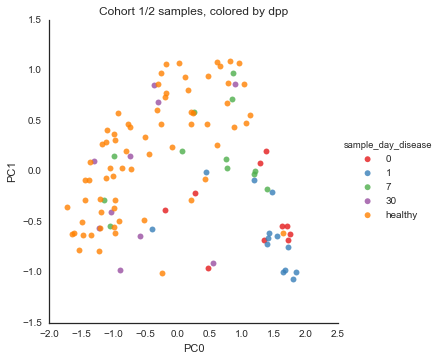

In [138]:
keepdays = ['healthy', 0, 1, 7, 30]
tmp = dada_noetec_toplot.query('sample_day_disease == @keepdays')
sns.lmplot(x='PC0', y='PC1', data=tmp, hue='sample_day_disease', 
           fit_reg=False, hue_order=[0, 1, 7, 30, 'healthy'],
           scatter_kws={"s": 35}, palette="Set1")
plt.title('Cohort 1/2 samples, colored by dpp')

In [139]:
dada_noetec_toplot['household-subject'] = dada_noetec_toplot['Household'] + '-' + dada_noetec_toplot['Subject / Contact'].astype(str)

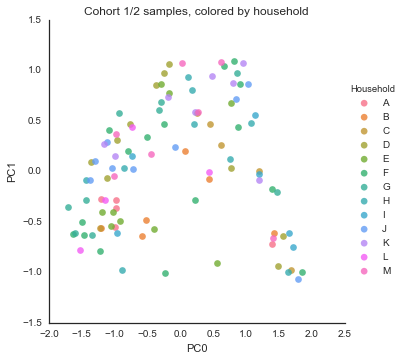

In [140]:
sns.lmplot(x='PC0', y='PC1', data=dada_noetec_toplot, hue='Household', 
           fit_reg=False,
           scatter_kws={"s": 45})
plt.title('Cohort 1/2 samples, colored by household')

Hm, doesn't really look as striking as the paper.

I need to find out which samples Lawrence used to make this plot (I have way more healthy samples than he does) - just for a sanity check. Could also consider re-doing this analysis with 97% OTUs...

# 97% OTUs

Let's repeat the above analyses with the 97% OTU table, which is what they used in the paper

In [141]:
fotu = '../../data/raw/david/pipeline/david_cholera_results/RDP/david_cholera.otu_table.97.denovo.rdp_assigned'
df = pd.read_csv(fotu, sep='\t', index_col=0)
df.head()

,ETEC10,ETEC11,ETEC12,ETEC13,ETEC14,ETEC15,ETEC16,ETEC17,ETEC18,ETEC19,...,PreRx27,PreRx28,PreRx29,PreRx30,PreRx31,PreRx32,PreRx33,PreRx34,PreRx35,PreRx36
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__;s__;d__denovo56,16,22,0,0,0,0,0,0,0,0,...,0,2725,44,3,1,0,0,53,2,0
k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Ectothiorhodospiraceae;g__Thioalkalivibrio;s__;d__denovo1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Bacteroidetes;c__;o__;f__;g__;s__;d__denovo3059,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo3058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


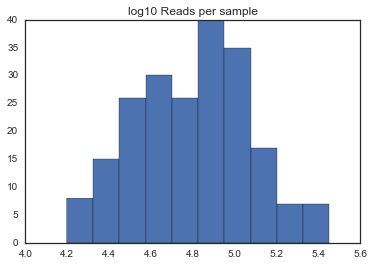

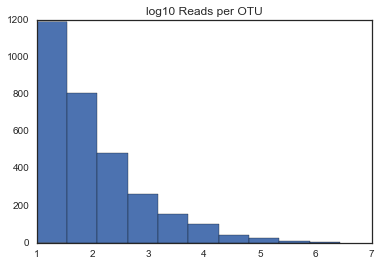

In [142]:
# Reads per sample
plt.hist(np.log10(df.sum()))
plt.title('log10 Reads per sample')

plt.figure()
plt.hist(np.log10(df.sum(axis=1)))
plt.title('log10 Reads per OTU')

## PCA

In [143]:
# Rows should contain samples, columns should have OTUs
df = df.T

# Calculate beta diversity
metric = 'braycurtis'
counts = df.astype(int).values
sample_ids = df.index.tolist()

results = beta_diversity(
    metric=metric,
    counts=counts,
    ids=sample_ids)

# Do PCA
clustered_all_pca = PCA(random_state=12345).fit(results.to_data_frame().values)
ypca = clustered_all_pca.transform(results.to_data_frame().values)

# Put PCs into a dataframe
dfpca = pd.DataFrame(data=ypca, index=sample_ids, columns=['PC' + str(i) for i in range(ypca.shape[1])])

# Make dataframe for plotting
clustered_all_toplot = pd.DataFrame(columns=['sample', 'PC0', 'PC1', 'disease'])
clustered_all_toplot['sample'] = dfpca.index
clustered_all_toplot['PC0'] = dfpca['PC0'].values
clustered_all_toplot['PC1'] = dfpca['PC1'].values
clustered_all_toplot = pd.merge(clustered_all_toplot, meta, left_on='sample', right_index=True)
clustered_all_toplot = clustered_all_toplot.drop(['LinkerPrimerSequence', 'Mapped Reads', 'Mapped reads'], axis=1)
clustered_all_toplot['disease_color'] = clustered_all_toplot['DiseaseState'].apply(lambda x: 'r' if x == "Diarrhea" else 'b')

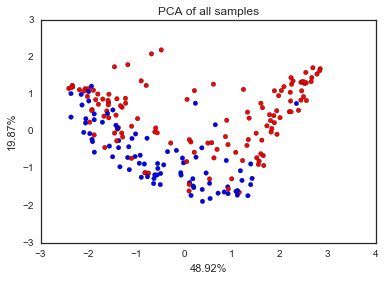

In [144]:
# Plot all the samples
plt.scatter(clustered_all_toplot['PC0'], clustered_all_toplot['PC1'], c=clustered_all_toplot['disease_color'])
plt.title("PCA of all samples")
plt.xlabel('{:.2f}%'.format(clustered_all_pca.explained_variance_ratio_[0]*100))
plt.ylabel('{:.2f}%'.format(clustered_all_pca.explained_variance_ratio_[1]*100))

## No ETEC samples

In [145]:
keep_cohorts = ["1", "2"]
cohort1_results = results\
    .to_data_frame()\
    .loc[
        meta.query('Cohort == @keep_cohorts').index, 
        meta.query('Cohort == @keep_cohorts').index
    ]
    
# Re-do PCA
clustered_noetec_pca1 = PCA(random_state=12345).fit(cohort1_results.values)
ypca1 = pca1.transform(cohort1_results.values)

dfpca1 = pd.DataFrame(data=ypca1, index=cohort1_results.index, 
                      columns=['PC' + str(i) for i in range(ypca1.shape[1])])

# Make dataframe for plotting
clustered_noetec_toplot = pd.DataFrame(columns=['sample', 'PC0', 'PC1', 'disease'])
clustered_noetec_toplot['sample'] = dfpca1.index
clustered_noetec_toplot['PC0'] = dfpca1['PC0'].values
clustered_noetec_toplot['PC1'] = dfpca1['PC1'].values
clustered_noetec_toplot = pd.merge(clustered_noetec_toplot, meta, left_on='sample', right_index=True)
clustered_noetec_toplot = clustered_noetec_toplot.drop(['LinkerPrimerSequence', 'Mapped Reads', 'Mapped reads'], axis=1)
clustered_noetec_toplot['disease_color'] = clustered_noetec_toplot['DiseaseState'].apply(lambda x: 'r' if x == "Diarrhea" else 'b')

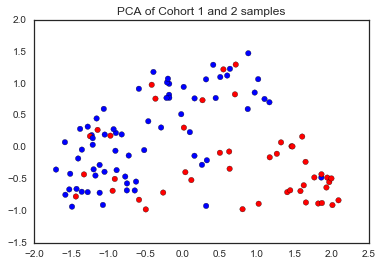

In [146]:
plt.scatter(clustered_noetec_toplot['PC0'], clustered_noetec_toplot['PC1'], c=clustered_noetec_toplot['disease_color'], s=30)
plt.title("PCA of Cohort 1 and 2 samples")

Try to re-make the Fig 1C plot

In [147]:
def relabel_sample_day(row):
    if row['DiseaseState'] == "Healthy":
        return "healthy"
    else:
        day = row['Sample day (dpp)']
        if day == 0 or day == 1:
            return day
        elif 4 < day < 10:
            return 7
        elif day > 15:
            return 30
clustered_noetec_toplot['sample_day_disease'] = clustered_noetec_toplot.apply(relabel_sample_day, axis=1)

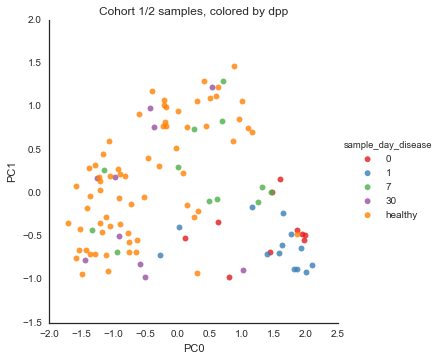

In [148]:
keepdays = ['healthy', 0, 1, 7, 30]
tmp = clustered_noetec_toplot.query('sample_day_disease == @keepdays')
sns.lmplot(x='PC0', y='PC1', data=tmp, hue='sample_day_disease', 
           fit_reg=False, hue_order=[0, 1, 7, 30, 'healthy'],
           scatter_kws={"s": 35}, palette="Set1")
plt.title('Cohort 1/2 samples, colored by dpp')

Yes, looks much more separate than the DADA2 results.

# Compare DADA2 and 97% results

Let's just plot the PCAs side by side and see how much of a difference these clustering methods make.

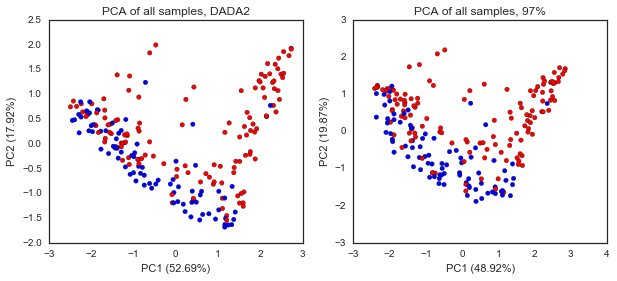

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(dada_all_toplot['PC0'], dada_all_toplot['PC1'], c=dada_all_toplot['disease_color'])
ax[0].set_title("PCA of all samples, DADA2")
ax[0].set_xlabel('PC1 ({:.2f}%)'.format(dada_all_pca.explained_variance_ratio_[0]*100))
ax[0].set_ylabel('PC2 ({:.2f}%)'.format(dada_all_pca.explained_variance_ratio_[1]*100))

ax[1].scatter(clustered_all_toplot['PC0'], clustered_all_toplot['PC1'], c=clustered_all_toplot['disease_color'])
ax[1].set_title("PCA of all samples, 97%")
ax[1].set_xlabel('PC1 ({:.2f}%)'.format(clustered_all_pca.explained_variance_ratio_[0]*100))
ax[1].set_ylabel('PC2 ({:.2f}%)'.format(clustered_all_pca.explained_variance_ratio_[1]*100))


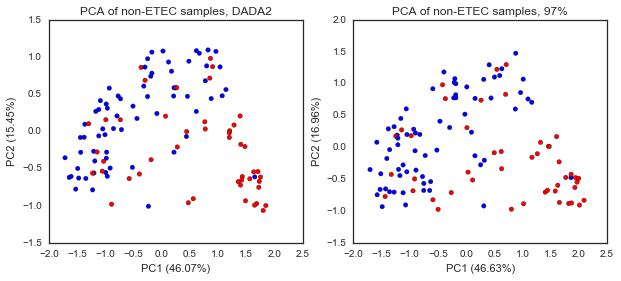

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(dada_noetec_toplot['PC0'], dada_noetec_toplot['PC1'], c=dada_noetec_toplot['disease_color'])
ax[0].set_title("PCA of non-ETEC samples, DADA2")
ax[0].set_xlabel('PC1 ({:.2f}%)'.format(dada_noetec_pca1.explained_variance_ratio_[0]*100))
ax[0].set_ylabel('PC2 ({:.2f}%)'.format(dada_noetec_pca1.explained_variance_ratio_[1]*100))

ax[1].scatter(clustered_noetec_toplot['PC0'], clustered_noetec_toplot['PC1'], c=clustered_noetec_toplot['disease_color'])
ax[1].set_title("PCA of non-ETEC samples, 97%")
ax[1].set_xlabel('PC1 ({:.2f}%)'.format(clustered_noetec_pca1.explained_variance_ratio_[0]*100))
ax[1].set_ylabel('PC2 ({:.2f}%)'.format(clustered_noetec_pca1.explained_variance_ratio_[1]*100))


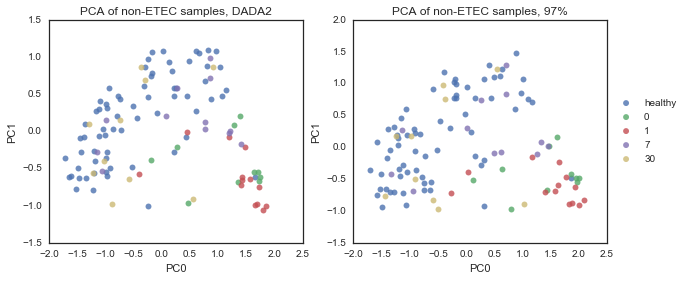

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

keepdays = ['healthy', 0, 1, 7, 30]

paldict = {i: j for i, j in zip(keepdays, sns.color_palette('deep', len(keepdays)))}

for dpp in keepdays:
    subdf = dada_noetec_toplot.query('sample_day_disease == @dpp')
    sns.regplot(x='PC0', y='PC1', data=subdf, ax=ax[0],
                fit_reg=False, scatter_kws={"s": 35}, 
                color=paldict[dpp], label=dpp)
ax[0].set_title('PCA of non-ETEC samples, DADA2')
    
for dpp in keepdays:
    subdf = clustered_noetec_toplot.query('sample_day_disease == @dpp')
    sns.regplot(x='PC0', y='PC1', data=subdf, ax=ax[1],
                fit_reg=False, scatter_kws={"s": 35}, 
                color=paldict[dpp], label=dpp)
ax[1].set_title('PCA of non-ETEC samples, 97%')

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Next steps

- paired statistical test: test whether (abundance_at_day0 - abundance_at_day_last) is different between the healthy contacts or the diarrhea patients     
- classifier: keeping same patients in the same fold, can you predict if it's pre- or post-infection?    
    - may need to get rid of cholera in these and re-normalize (?)    
    - how to incorporate healthy vs. diarrhea comparison? Maybe multi-step classification scheme?   